## Aaron P Lewis
### Note:
* When considering the entire range od latitude, it is clear that the high temperatures tends toward the Equator at lat=0.
* There is a stong correlation between temperature and latitude.
* It is hotter toward the Equator.

In [1]:
# Load the Dependencies
%matplotlib inline
import requests
from pprint import pprint
from config import api_key
import random
import json
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats
import numpy as np

In [2]:
# Load the JSON file.
# This file is a list of all cities, which was downloaded from the OpenWeather API documentation page, in JSON format.
filepath = os.path.join("..", "Resources", "city_list.json")
with open(filepath, "r", encoding='utf-8') as my_json_file:
    json_obj = json.load(my_json_file)

In [3]:
# Number of cities in json_obj, which is a list.
cities_count = len(json_obj)
print(f"There are {cities_count} cities from around the world in the JSON file obtained from OpenWeather API.")

There are 209579 cities from around the world in the JSON file obtained from OpenWeather API.


In [4]:
# Divide the city records into Northern Hemisphere (latitude >= 0) and Southern Hemisphere (latitude < 0).
# Collect the city id for search data search at OpenWeather API.
north_hem_id = []
south_hem_id = []

# Sort json_obj by latitude.
json_obj_sorted_lat = sorted(json_obj, key = lambda i: i['coord']['lat'],reverse=False)

for city_record in json_obj_sorted_lat[0:]:
    citylat = city_record['coord']['lat']
    if citylat >= 0:
        north_hem_id.append(city_record['id'])
    else:
        south_hem_id.append(city_record['id'])
north_cities_count = len(north_hem_id)
south_cities_count = len(south_hem_id)
print(f"There are {north_cities_count} Northern Hemisphere cities.")
print(f"There are {south_cities_count} Southern Hemisphere cities.")

There are 187583 Northern Hemisphere cities.
There are 21996 Southern Hemisphere cities.


### Random selection of city id.

In [22]:
# Create random selection of a total of 800 cities without repetition.
num_north_cities = 400
num_south_cities = 400
north_random_id = random.sample(north_hem_id, num_north_cities)
south_random_id = random.sample(south_hem_id, num_south_cities)

# Combine the two randomly selected lists.
random_id = north_random_id + south_random_id

print(f"{len(north_random_id)} randomly selected Northern Hemisphere cities.")
print(f"{len(south_random_id)} randomly selected Southern Hemisphere cities.")

400 randomly selected Northern Hemisphere cities.
400 randomly selected Southern Hemisphere cities.


In [23]:
# Set up the base URL. We will be using the city id to retrieve the infromation.
# This strategy eliminates ambiguity in city names when retrieving data.
units = "imperial"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&id="


In [24]:
# Lists and Dictionary
city_id_list = []
city_name_list = []
country_list = []
city_latitude_list = []
city_longitude_list = []
city_temp_list = []
city_hum_list = []
city_cloud_list = []
city_windspeed_list = []
city_date_list = []
log_list = []
weather_dict = {}
log_list_dict ={}

In [25]:
# Current time.
now = datetime.datetime.now()
current_date = now.strftime("%Y-%m-%d %I:%M %p")
date_string = str(current_date)
date_string

'2020-06-18 11:33 PM'

## Collect data from OpenWeather API.

In [26]:
record = 0
for each_id in random_id:
    record += 1
    
    # Build the query URL and make the request in Imperial units.
    query_url = url + str(each_id)
    
    # Try to grab the information from OpenWeather API, if they are available.
    try:
    
        # Get weather data from API
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        # Get the city information
        city_id = each_id 
        city_name = weather_json['name']   
        country = weather_json['sys']['country']    
        city_latitude = weather_json['coord']['lat']   
        city_longitude = weather_json['coord']['lon']
        
        processing_str = f"Record {record} is found. | {city_name}, {country}: city id = {city_id}"

        # Get the city weather information from JSON response
        city_temp = weather_json['main']["temp_max"]    
        city_hum = weather_json['main']['humidity']    
        city_cloud = weather_json['clouds']['all']   
        city_windspeed = weather_json['wind']['speed']
        city_date = weather_json['dt']
        
        # Append the lists.
        city_id_list.append(city_id)
        city_name_list.append(city_name)
        country_list.append(country)
        city_latitude_list.append(format(city_latitude, ".2f"))  
        city_longitude_list.append(format(city_longitude, ".2f"))
        city_temp_list.append(city_temp)
        city_hum_list.append(city_hum)
        city_cloud_list.append(city_cloud)
        city_windspeed_list.append(city_windspeed)
        city_date_list.append(city_date)
        log_list.append(processing_str)
         
    # Handle exceptions for a "city_id" that is not available in the OpenWeather API.
    except:
        processing_str = f"Record {record} is not found. | {city_name}, {country}: city id = {city_id}"
        log_list.append(processing_str)
        
print(f"{len(city_temp_list)} city records were found.")

800 city records were found.


In [27]:
# Create a dictionary with the information.    
weather_dict["City_id"] = city_id_list
weather_dict["Country"] = country_list
weather_dict["City_name"] = city_name_list
weather_dict["Latitude"] = city_latitude_list
weather_dict["Longitude"] = city_longitude_list
weather_dict["Temperature"] = city_temp_list
weather_dict["Humidity"] = city_hum_list
weather_dict["Clouding"] = city_cloud_list
weather_dict["Windspeed"] = city_windspeed_list
weather_dict["Date"] = city_date_list
log_list_dict["Processing Log"] = log_list

In [28]:
# Create the DataFrame.
log_list_df = pd.DataFrame(data = log_list_dict)
weather_dict_df = pd.DataFrame(data = weather_dict)

# Save the DataFrame as a csv file.
# Note to avoid any issues later, use encoding="utf-8"
weather_csv_path = os.path.join("..", "output_data", "cities_weather_data.csv")
weather_dict_df.to_csv(weather_csv_path, encoding="utf-8", index=False)

log_csv_path = os.path.join("..", "output_data", "processing_log.csv")
log_list_df.to_csv(log_csv_path, encoding="utf-8", index=False)

In [29]:
print(date_string)
log_list_df.head()

2020-06-18 11:33 PM


,Processing Log
0,"Record 1 is found. | Ossuccio, IT: city id = 6..."
1,"Record 2 is found. | Breitenworbis, DE: city i..."
2,"Record 3 is found. | Durango, MX: city id = 40..."
3,"Record 4 is found. | Saint-Nicolas-des-Biefs, ..."
4,"Record 5 is found. | Vasilaţi, RO: city id = 6..."


In [30]:
print(date_string)
weather_dict_df.head()

2020-06-18 11:33 PM


,City_id,Country,City_name,Latitude,Longitude,Temperature,Humidity,Clouding,Windspeed,Date
0,6534444,IT,Ossuccio,45.97,9.18,57.00,100,20,2.24,1592541225
1,2944516,DE,Breitenworbis,51.40,10.42,55.00,100,100,3.87,1592541225
2,4011741,MX,Durango,24.83,-104.83,67.19,56,99,7.27,1592541071
3,2977878,FR,Saint-Nicolas-des-Biefs,46.06,3.78,53.60,87,75,2.44,1592541226
4,663128,RO,Vasilaţi,44.29,26.45,63.00,92,100,7.00,1592541226


In [31]:
weather_dict_df["Latitude"] = weather_dict_df["Latitude"].astype("float")
weather_dict_df["Longitude"] = weather_dict_df["Longitude"].astype("float")
weather_dict_df["Windspeed"] = weather_dict_df["Windspeed"].astype("float")
 
weather_dict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City_id      800 non-null    int64  
 1   Country      800 non-null    object 
 2   City_name    800 non-null    object 
 3   Latitude     800 non-null    float64
 4   Longitude    800 non-null    float64
 5   Temperature  800 non-null    float64
 6   Humidity     800 non-null    int64  
 7   Clouding     800 non-null    int64  
 8   Windspeed    800 non-null    float64
 9   Date         800 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 62.6+ KB


### Maximum Temperature (F) vs. Latitude

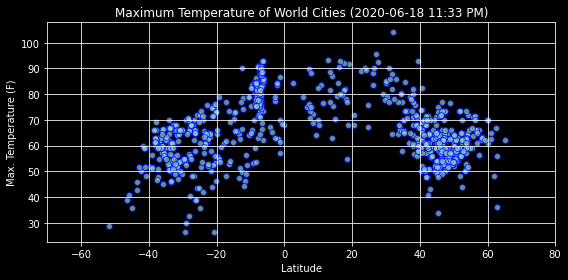

In [33]:
# Build a scatter plot.
x_values = weather_dict_df["Latitude"]
y_values = weather_dict_df["Temperature"]
plt.scatter(x_values, y_values, edgecolors = "b", alpha = 0.7)

# Label the graph.
plt.style.use("dark_background")
plt.title(f"Maximum Temperature of World Cities ({date_string})")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")

plt.xlim(-70.00, 80.00)

#plt.axhline(0, c = "red", ls = "--")
#plt.axvline(0, c = "red", ls = "--", lw = 3, ymin = 0.02, ymax = 0.98)

plt.rcParams["figure.figsize"] = (8, 4)

plt.grid(True)

# Show plot
plt.tight_layout()

# Save our graph
image_path1 = os.path.join("..", "Images", "cities_temp_lat.png")
plt.savefig(image_path1)
plt.show()

## Humidity (%) vs. Latitude

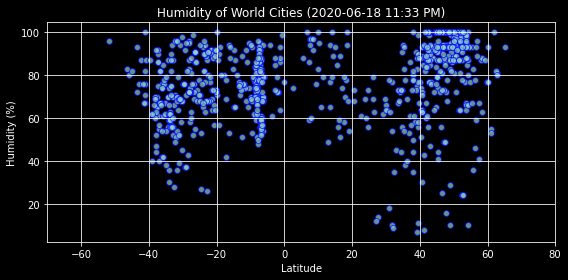

In [34]:
# Build a scatter plot.
x_values = weather_dict_df["Latitude"]
y_values = weather_dict_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors = "b", alpha = 0.7)

# Label the graph.
plt.style.use("dark_background")
plt.title(f"Humidity of World Cities ({date_string})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.xlim(-70.00, 80.00)

#plt.axhline(0, c = "red", ls = "--")
#plt.axvline(0, c = "red", ls = "--", lw = 3, ymin = 0.02, ymax = 0.98)

plt.rcParams["figure.figsize"] = (8, 4)

plt.grid(True)

# Show plot
plt.tight_layout()

# Save our graph
image_path2 = os.path.join("..", "Images", "cities_hum_lat.png")
plt.savefig(image_path2)
plt.show()

## Cloudiness (%) vs. Latitude

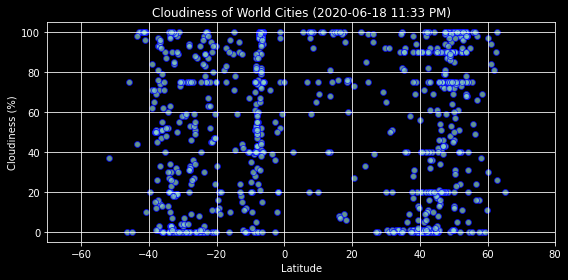

In [35]:
# Build a scatter plot.
x_values = weather_dict_df["Latitude"]
y_values = weather_dict_df["Clouding"]
plt.scatter(x_values, y_values, edgecolors = "b", alpha = 0.7)

# Label the graph.
plt.style.use("dark_background")
plt.title(f"Cloudiness of World Cities ({date_string})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.xlim(-70.00, 80.00)

#plt.axhline(0, c = "red", ls = "--")
#plt.axvline(0, c = "red", ls = "--", lw = 3, ymin = 0.02, ymax = 0.98)

plt.rcParams["figure.figsize"] = (8, 4)

plt.grid(True)

# Show plot
plt.tight_layout()

# Save our graph
image_path3 = os.path.join("..", "Images", "cities_cloud_lat.png")
plt.savefig(image_path3)
plt.show()

## Wind Speed (mph) vs. Latitude

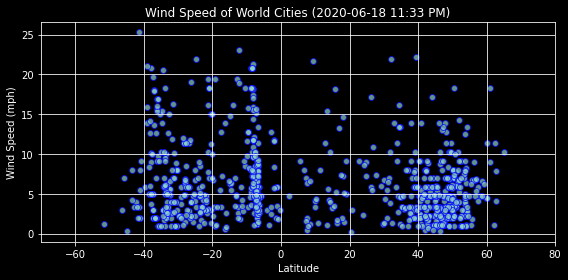

In [36]:
# Build a scatter plot.
x_values = weather_dict_df["Latitude"]
y_values = weather_dict_df["Windspeed"]
plt.scatter(x_values, y_values, edgecolors = "b", alpha = 0.7)

# Label the graph.
plt.style.use("dark_background")
plt.title(f"Wind Speed of World Cities ({date_string})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.xlim(-70.00, 80.00)

#plt.axhline(0, c = "red", ls = "--")
#plt.axvline(0, c = "red", ls = "--", lw = 3, ymin = 0.02, ymax = 0.98)

plt.rcParams["figure.figsize"] = (8, 4)

plt.grid(True)

# Show plot
plt.tight_layout()

# Save our graph
image_path4 = os.path.join("..", "Images", "cities_wind_lat.png")
plt.savefig(image_path4)
plt.show()

In [37]:
weather_dict_df.head()

,City_id,Country,City_name,Latitude,Longitude,Temperature,Humidity,Clouding,Windspeed,Date
0,6534444,IT,Ossuccio,45.97,9.18,57.00,100,20,2.24,1592541225
1,2944516,DE,Breitenworbis,51.40,10.42,55.00,100,100,3.87,1592541225
2,4011741,MX,Durango,24.83,-104.83,67.19,56,99,7.27,1592541071
3,2977878,FR,Saint-Nicolas-des-Biefs,46.06,3.78,53.60,87,75,2.44,1592541226
4,663128,RO,Vasilaţi,44.29,26.45,63.00,92,100,7.00,1592541226


In [38]:
# Northern Hemisphere (latitude >= 0) DataFrame
northern_hemisphere_df = weather_dict_df[weather_dict_df["Latitude"] >= 0]
northern_hemisphere_df.head()

,City_id,Country,City_name,Latitude,Longitude,Temperature,Humidity,Clouding,Windspeed,Date
0,6534444,IT,Ossuccio,45.97,9.18,57.00,100,20,2.24,1592541225
1,2944516,DE,Breitenworbis,51.40,10.42,55.00,100,100,3.87,1592541225
2,4011741,MX,Durango,24.83,-104.83,67.19,56,99,7.27,1592541071
3,2977878,FR,Saint-Nicolas-des-Biefs,46.06,3.78,53.60,87,75,2.44,1592541226
4,663128,RO,Vasilaţi,44.29,26.45,63.00,92,100,7.00,1592541226


In [39]:
# Southern Hemisphere (latitude < 0)
southern_hemisphere_df = weather_dict_df[weather_dict_df["Latitude"] < 0]
southern_hemisphere_df.head()

,City_id,Country,City_name,Latitude,Longitude,Temperature,Humidity,Clouding,Windspeed,Date
400,2177451,AU,Avoca Beach,-33.47,151.43,66.00,75,3,9.95,1592541294
401,2161969,AU,Kamarooka,-36.47,144.33,59.00,67,47,1.99,1592541294
402,3472338,BR,Américo Brasiliense,-21.72,-48.10,58.08,92,45,4.00,1592541294
403,7839596,AU,Kulin,-32.77,118.77,56.14,52,0,5.66,1592541294
404,7380188,ID,Aeteke,-8.80,121.98,83.91,61,51,5.17,1592541295


## Create a function to do the regression analysis.

In [40]:
def regression_anylt(x_col, y_col, hemis):
    x_col = str(x_col).capitalize()
    y_col = str(y_col).capitalize()
    hemis = str(hemis).lower()
    cols_abbr = {"Latitude" : "lat",
                   "Temperature" : "temp",
                   "Humidity" : "hum",
                   "Clouding" : "cloud",
                   "Windspeed" : "wind"}
    y_axis_label = {"Windspeed" : "Windspeed (mph)",
                   "Temperature" : "Max. Temperature (F)",
                   "Humidity" : "Humidity (%)",
                   "Clouding" : "Clouding (%)"
                   }
    
    # Create a Scatter Plot for temperature vs latitude
    if hemis == "northern":
        x_values = northern_hemisphere_df[x_col]
        y_values = northern_hemisphere_df[y_col]
        plt.title(f"Northern Hemisphere - City {x_col} vs. {y_col} ({date_string})")
            
        # Label plot and annotate the line equation
        plt.xlabel(x_col)
        plt.xlim(-5, 80.00)
        plt.ylabel(y_axis_label[y_col])
        
        # Path for saving graph to png file.
        string1 = cols_abbr[y_col]
        string2 = cols_abbr[x_col]
        path = os.path.join("..", "Images", f"{string1}_{string2}_north.png")
              
    elif hemis == "southern":
        x_values = southern_hemisphere_df[x_col]
        y_values = southern_hemisphere_df[y_col]
        plt.title(f"Southern Hemisphere - City {x_col} vs. {y_col} ({date_string})")
        
        # Label plot and annotate the line equation
        plt.xlabel(x_col)
        plt.xlim(-60.00, 5)
        plt.ylabel(y_axis_label[y_col])
        
        # Path for saving graph to png file.
        string1 = cols_abbr[y_col]
        string2 = cols_abbr[x_col]
        path = os.path.join("..", "Images", f"{string1}_{string2}_south.png")

    # Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Use the minimum y-value to help position the annotation of regression line.
    y_coord_min = y_values.min()
    
    if hemis == "northern":
        plt.annotate(line_eq,(-2,y_coord_min),fontsize=15,color="red")
    elif hemis == "southern":
        plt.annotate(line_eq,(-58,y_coord_min),fontsize=15,color="red")

    # Create Plot
    #plt.style.use("ggplot")
    plt.rcParams["figure.figsize"] = (8, 4)
    plt.scatter(x_values,y_values, edgecolors = "b", alpha = 0.7)
    plt.plot(x_values,regress_values,"r-")

    # Print r square value
    rsqrt = rvalue**2
    r_sqrt = format(rsqrt, ".2f")

    print(f"The r-squared is: {r_sqrt}")

    # Show plot
    plt.tight_layout()
    
    # Save our graph
    plt.savefig(path)
    plt.show()

### Northern Hemisphere - Temperature (F) vs. Latitude

* There is a strong negative correlation between latitude and temperature in the Northern.
* In the case 39% of the variation in temperature is explained the the latitude location.

The r-squared is: 0.39


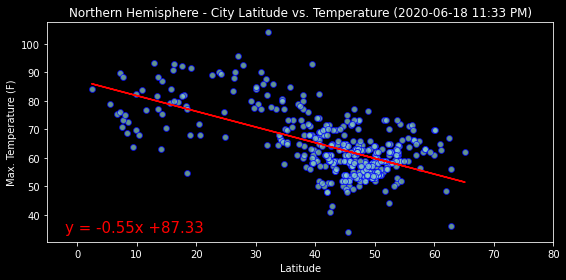

In [42]:
x = "Latitude"
y = "Temperature"
hemis = "Northern"
regression_anylt(x, y, hemis)

### Southern Hemisphere - Temperature (F) vs. Latitude

* There is a strong positive correlation between latitude and temperature Southern Hemisphere.
* Again, in the case 46% of the variation in temperature is explained the the latitude location.

The r-squared is: 0.46


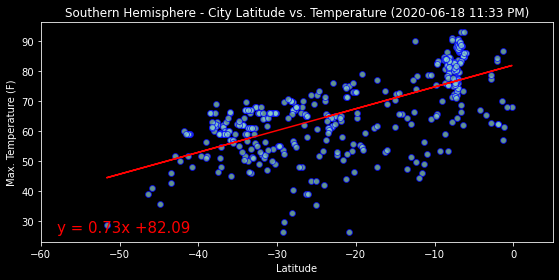

In [44]:
x = "Latitude"
y = "Temperature"
hemis = "Southern"
regression_anylt(x, y, hemis)

### Northern Hemisphere - Humidity (%) vs. Latitude

* There is a very weak positive correlation between latitude and humidity in the Northern and Southern Hemisphere.

The r-squared is: 0.02


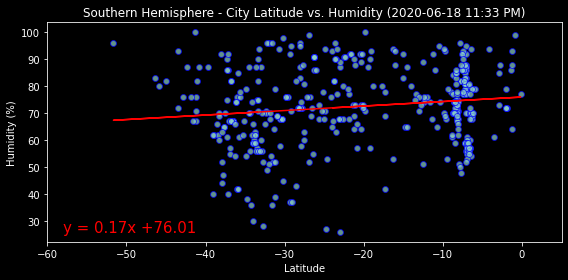

In [45]:
x = "Latitude"
y = "Humidity"
hemis = "Southern"
regression_anylt(x, y, hemis)

### Southern Hemisphere - Humidity (%) vs. Latitude

* There is a very weak positive correlation between latitude and humidity in the Northern and Southern Hemisphere.

The r-squared is: 0.02


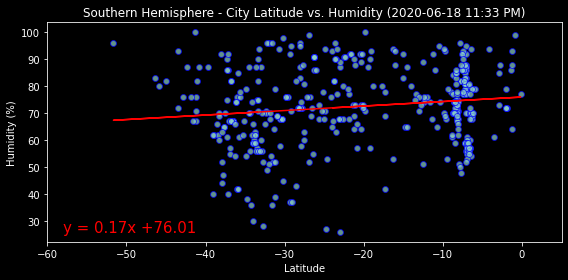

In [46]:
x = "Latitude"
y = "Humidity"
hemis = "Southern"
regression_anylt(x, y, hemis)

### Northern Hemisphere - Cloudiness (%) vs. Latitude

* There is no correlation between latitude and cloudiness in the Northern and Southern Hemisphere.

The r-squared is: 0.00


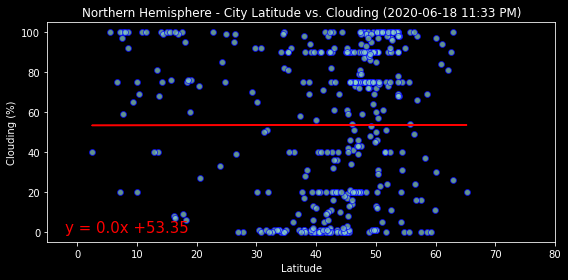

In [47]:
x = "Latitude"
y = "Clouding"
hemis = "Northern"
regression_anylt(x, y, hemis)

### Southern Hemisphere - Cloudiness (%) vs. Latitude

* There is virtually no correlation between latitude and cloudiness in the Northern and Southern Hemisphere.

The r-squared is: 0.04


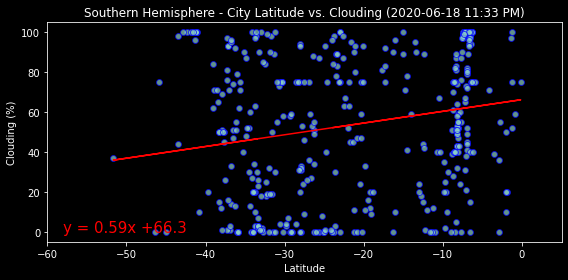

In [48]:
x = "Latitude"
y = "Clouding"
hemis = "Southern"
regression_anylt(x, y, hemis)

### Northern Hemisphere - Wind Speed (mph) vs. Latitude

* There is no correlation between latitude and windspeed in the Northern and Southern Hemisphere.

The r-squared is: 0.01


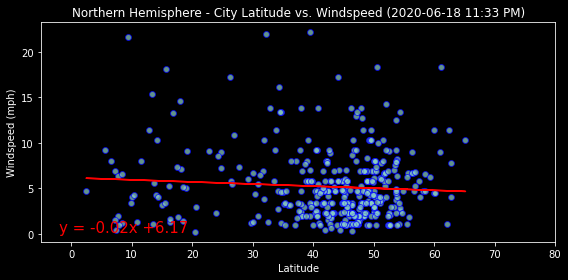

In [49]:
x = "Latitude"
y = "Windspeed"
hemis = "Northern"
regression_anylt(x, y, hemis)

### Southern Hemisphere - Wind Speed (mph) vs. Latitude
* There is no correlation between latitude and windspeed in the Northern and Southern Hemisphere.

The r-squared is: 0.00


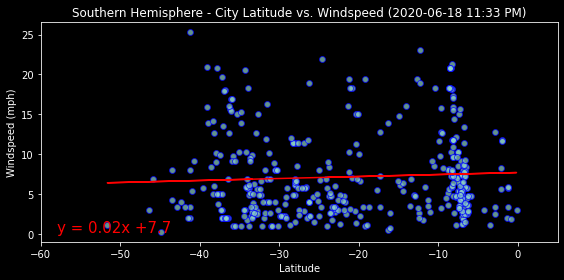

In [50]:
x = "Latitude"
y = "Windspeed"
hemis = "Southern"
regression_anylt(x, y, hemis)